In [ ]:
#c, determine when to buy and sell stocks
#occurs when a short term average crosses a long term average
#this signal is used to identfy that momentum is shifting onto the short term average.
#A buy signal is generated when a short term average corsses the long term avarage and rises above it
#A sell signal is generated while a short term average is crossing a long term average and is falling below it

In [ ]:
#import the libaries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load the data using googles website
from google.colab import files
uploaded =files.upload()

Saving FB.csv to FB.csv


In [ ]:
#Store the data
FB= pd.read_csv('FB.csv')
#Show the data
FB
#start 03.09.2019
#end 01.09.2020

,Date,Open,High,Low,Close,Adj Close,Volume
0,03/09/2019,184.000000,185.669998,182.110001,182.389999,182.389999,9779400
1,04/09/2019,184.649994,187.750000,183.889999,187.139999,187.139999,11308000
2,05/09/2019,188.529999,191.360001,187.940002,190.899994,190.899994,13876700
3,06/09/2019,190.210007,190.210007,186.350006,187.490005,187.490005,15226800
4,09/09/2019,187.729996,188.979996,185.850006,188.759995,188.759995,14722400
...,...,...,...,...,...,...,...
248,26/08/2020,284.000000,304.670013,284.000000,303.910004,303.910004,69015200
249,27/08/2020,300.160004,301.230011,292.019989,293.220001,293.220001,30301300
250,28/08/2020,295.000000,297.230011,290.980011,293.660004,293.660004,17172400
251,31/08/2020,293.950012,296.880005,291.549988,293.200012,293.200012,17345100


<function matplotlib.pyplot.show>

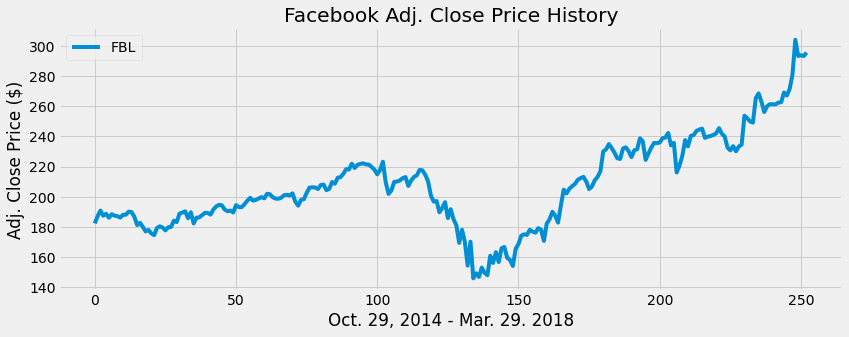

In [ ]:
#visualise the data
plt.figure(figsize=(12.5,4.5))
plt.plot(FB['Adj Close'], label='FBL')
plt.title('Facebook Adj. Close Price History')
plt.xlabel('Oct. 03, 2019 - Oct. 01. 2020')
plt.ylabel('Adj. Close Price ($)')
plt.legend(loc='upper left')
plt.show
#important, the dataset only has 252 rows! Thus only 1 year

In [ ]:
#Create simple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = FB['Adj Close'].rolling(window=30).mean()
SMA30

In [ ]:
#Create a simple moving average with a 100 day window
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = FB['Adj Close'].rolling(window=100).mean() #rolling considers the window where the calculations are to be performed on. then the mean is the calculation on the values in that window
SMA100

<function matplotlib.pyplot.show>

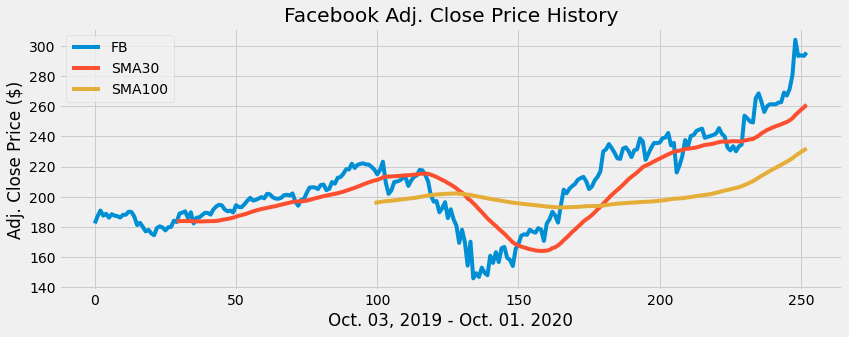

In [ ]:
#Visualise the data
plt.figure(figsize=(12.5,4.5))
plt.plot(FB['Adj Close'], label='FB')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('Facebook Adj. Close Price History')
plt.xlabel('Oct. 03, 2019 - Oct. 01. 2020')
plt.ylabel('Adj. Close Price ($)')
plt.legend(loc='upper left')
plt.show

In [ ]:
#Create a new data frame to store all the data
data =pd.DataFrame()
data['FB']= FB['Adj Close']
data['SMA30']=SMA30['Adj Close']
data['SMA100']=SMA100['Adj Close']
data

,FB,SMA30,SMA100
0,182.389999,NaN,NaN
1,187.139999,NaN,NaN
2,190.899994,NaN,NaN
3,187.490005,NaN,NaN
4,188.759995,NaN,NaN
...,...,...,...
248,303.910004,254.093668,227.081801
249,293.220001,255.836668,228.358501
250,293.660004,257.557668,229.606801
251,293.200012,259.150335,230.796001


In [ ]:
#create a function to signal when to buy and sell the asset/stock
def buy_sell(data):
  sigPriceBuy= []
  sigPriceSell=[]
  flag = -1 #tells me when the moving averages crossed

  for i in range(len(data)):
    if data['SMA30'][i]>data['SMA100'][i]: #if the SMA30 is less than 100  = buy
      if flag !=1:
        sigPriceBuy.append(data['FB'][i])
        sigPriceSell.append(np.nan)
        flag =1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i]<data['SMA100'][i]: #if the sma30 is less than the sma 100 = sell
        if flag != 0:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(data['FB'][i])
          flag= 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
    else: 
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return (sigPriceBuy, sigPriceSell)

In [ ]:
#Store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price']= buy_sell[0]
data['Sell_Signal_Price']=buy_sell[1]


In [ ]:
#Show the data
data

,FB,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,182.389999,NaN,NaN,NaN,NaN
1,187.139999,NaN,NaN,NaN,NaN
2,190.899994,NaN,NaN,NaN,NaN
3,187.490005,NaN,NaN,NaN,NaN
4,188.759995,NaN,NaN,NaN,NaN
...,...,...,...,...,...
248,303.910004,254.093668,227.081801,NaN,NaN
249,293.220001,255.836668,228.358501,NaN,NaN
250,293.660004,257.557668,229.606801,NaN,NaN
251,293.200012,259.150335,230.796001,NaN,NaN


<function matplotlib.pyplot.show>

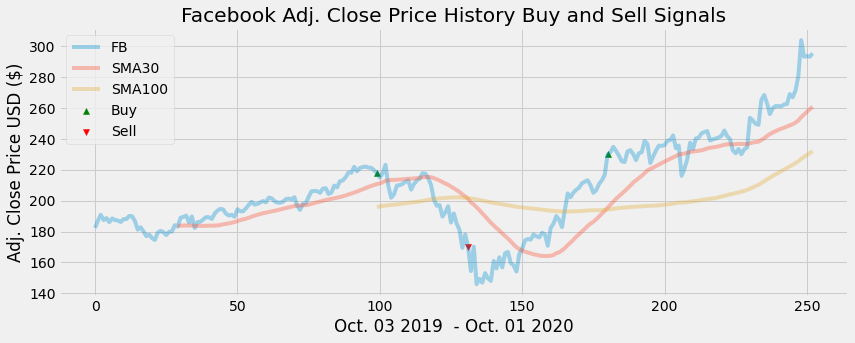

In [ ]:
#Visualise the data and the strategy to buy and sell the stock
plt.figure(figsize=(12.6,4.6))
plt.plot(data['FB'], label = 'FB', alpha=0.35)
plt.plot(data['SMA30'], label ='SMA30', alpha=0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker ='^', color ='green')
plt.scatter(data.index, data['Sell_Signal_Price'], label='Sell', marker ='v', color ='red')
plt.title('Facebook Adj. Close Price History Buy and Sell Signals')
plt.xlabel('Oct. 03 2019  - Oct. 01 2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show
